<a href="https://colab.research.google.com/github/navaneethsdk/Deep-Learning-Projects/blob/master/MTCNN_andFacenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [ ]:
from keras.models import load_model

# face detection for the  Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray, load
from mtcnn.mtcnn import MTCNN

# to calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

import cv2
import os
import numpy as np
import random
from shutil import copyfile

Using TensorFlow backend.


In [ ]:
base_dir = '/content/Humans'

In [ ]:
formats = ['.jpeg','.jpg','.png']
def getFrame(sec,directory,plabel,vidcap,count):
  vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
  hasFrames,image = vidcap.read()
  if hasFrames:
      cv2.imwrite(plabel+"_"+str(count)+".jpg", image)   # save frame as JPG file
  return hasFrames


def videoTOimage(video, directory , personlabel):
  os.chdir(directory)
  vidcap = cv2.VideoCapture(video)
  sec = 0
  frameRate = 5 #//it will capture image in each 5 second
  count=1
  success = getFrame(sec,directory,personlabel,vidcap,count)
  while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec,directory,personlabel,vidcap,count)
  print(count)
  print(len(os.listdir(directory)))

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  lis = os.listdir(SOURCE)
  print(len(lis))
  lis_=[]
  for img in lis:
    if img[img.find('.'):] in formats:
      if(os.path.getsize(SOURCE)!=0):
        lis_.append(img)
  random.sample(lis_, len(lis_))
  thp = int(SPLIT_SIZE*len(lis_)) 
  training = lis_[0:thp]
  test = lis_[thp:]
  for img in training :
      copyfile(SOURCE+img, TRAINING+img)   
  for img in test :
      copyfile(SOURCE+img, TESTING+img)

In [ ]:

train_dir = os.path.join( base_dir, 'train/')
validation_dir = os.path.join( base_dir, 'validation/')
train_Trump_dir = os.path.join(train_dir, 'Trump/') # Directory with our training Trump pictures
train_Clinton_dir = os.path.join(train_dir, 'Clinton/') # Directory with our training Clinton pictures
validation_Trump_dir = os.path.join(validation_dir, 'Trump/') # Directory with our validation Trump pictures
validation_Clinton_dir = os.path.join(validation_dir, 'Clinton/')# Directory with our validation Clinton pictures



In [ ]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(train_Trump_dir)
os.mkdir(train_Clinton_dir)
os.mkdir(validation_Trump_dir)
os.mkdir(validation_Clinton_dir)
os.mkdir('/content/datalakeTrump')
os.mkdir('/content/datalakeClinton')

In [ ]:
directory = ['/content/datalakeTrump/','/content/datalakeClinton/']

In [ ]:

people_videos = {'P1':'video1.mp4' ,'P2':'video2.mp4'}
count =0
print(people_videos.items())
for people in people_videos.items():
  print(people[1], directory[count] , people[0])
  videoTOimage(people[1], directory[count] , people[0])
  count +=1



dict_items([('P1', 'video1.mp4'), ('P2', 'video2.mp4')])
video1.mp4 /content/datalakeTrump/ P1
34
34
video2.mp4 /content/datalakeClinton/ P2
40
40


In [ ]:
split_data(directory[0],train_Trump_dir,validation_Trump_dir,0.7)
split_data(directory[1],train_Clinton_dir,validation_Clinton_dir,0.7)

34
40


In [ ]:

# load the model
model = load_model('/content/drive/My Drive/Facenet/facenet_keras.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]


In [ ]:


# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	
	# extract the bounding box from the first face
	if len(results)	!=0:
		x1, y1, width, height = results[0]['box']
		# bug fix
		x1, y1 = abs(x1), abs(y1)
		x2, y2 = x1 + width, y1 + height
		# extract the face
		face = pixels[y1:y2, x1:x2]
		# resize pixels to the model size
		image = Image.fromarray(face)
		image = image.resize(required_size)
		face_array = asarray(image)
		return face_array
	else :
		return np.array([0])


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)
16 (160, 160, 3)
17 (160, 160, 3)
18 (160, 160, 3)
19 (160, 160, 3)
20 (160, 160, 3)


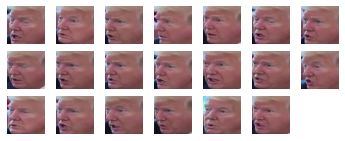

In [ ]:
# specify folder to plot
folder = '/content/Humans/train/Trump/'
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	if not np.any(face):
		continue

	print(i, face.shape)
	# plot
	pyplot.subplot(5, 7, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [ ]:
# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		if np.any(face):
			faces.append(face)
	return faces
 
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

In [ ]:
# load train dataset
trainX, trainy = load_dataset('/content/Humans/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/Humans/validation/')


>loaded 20 examples for class: Trump
>loaded 25 examples for class: Clinton
(45, 160, 160, 3) (45,)
>loaded 10 examples for class: Trump
>loaded 11 examples for class: Clinton


In [ ]:
os.chdir('/content')# earlier the current directory was datlake2 now the current is switched to the main directory
# save arrays to one file in compressed format
savez_compressed('Trump-clinton.npz', trainX, trainy, testX, testy)

In [ ]:

# load the face dataset
data = load('Trump-clinton.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)


Loaded:  (45, 160, 160, 3) (45,) (21, 160, 160, 3) (21,)


In [ ]:
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]


In [ ]:
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('Trump-clinton-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)


(45, 128)
(21, 128)


In [ ]:

# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('Trump-clinton-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model_SVM
model_SVM = SVC(kernel='linear', probability=True)
model_SVM.fit(trainX, trainy)
# predict
yhat_train = model_SVM.predict(trainX)
yhat_test = model_SVM.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=45, test=21
Accuracy: train=100.000, test=100.000


In [ ]:
filename = '/content/trump.jpg'

In [ ]:
face_pixels = extract_face(filename)
print(face_pixels.shape)
embedding = get_embedding(model, face_pixels)
# prediction for the face
samples = expand_dims(embedding, axis=0)
yhat_class = model_SVM.predict(samples)
yhat_prob = model_SVM.predict_proba(samples)
class_index = yhat_class[0]
predict_names = out_encoder.inverse_transform(yhat_class)
class_probability = yhat_prob[0,class_index] * 100
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
#here P1 is Trump

(160, 160, 3)
Predicted: Trump (100.000)


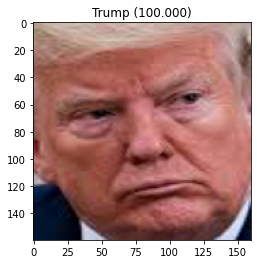

In [ ]:
  # plot for fun
pyplot.imshow(face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [ ]:
filename = '/content/HIlary.jpg'

In [ ]:
face_pixels = extract_face(filename)
print(face_pixels.shape)
embedding = get_embedding(model, face_pixels)
# prediction for the face
samples = expand_dims(embedding, axis=0)
yhat_class = model_SVM.predict(samples)
yhat_prob = model_SVM.predict_proba(samples)
class_index = yhat_class[0]
predict_names = out_encoder.inverse_transform(yhat_class)
class_probability = yhat_prob[0,class_index] * 100
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))

(160, 160, 3)
Predicted: Clinton (100.000)


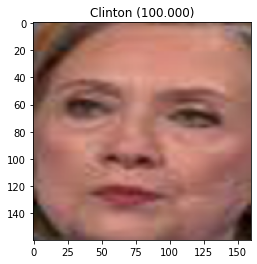

In [ ]:
  # plot for fun
pyplot.imshow(face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()
#here P2 is Clinton